In [1]:
import numpy as np
data = np.loadtxt('data3.txt')
X = data[:,:-1]
Y = data[:,-1]

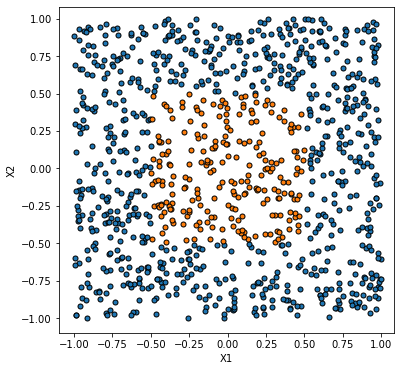

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(*X[Y==0].T, s=25, marker="o", alpha=1, edgecolors="k")
plt.scatter(*X[Y==1].T, s=25, marker="o", alpha=1, edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,Y)
cn=['0','1']

In [4]:
#!pip install graphviz

In [5]:
#tree.export_graphviz(clf,out_file="tree.dot",class_names=cn,filled=True)

In [6]:
#!dot -Tpng tree.dot -o tree.png

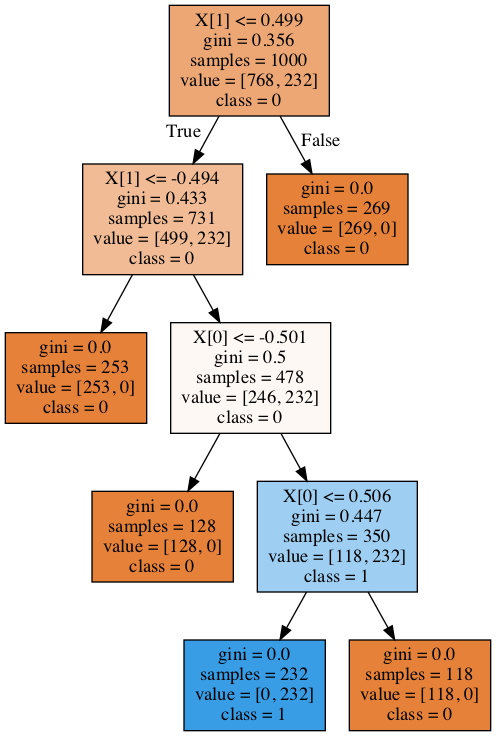

In [7]:
from IPython.display import Image
Image(filename='tree.png')


********** Running AdaBoost for n_estimator / stump = 1 **************


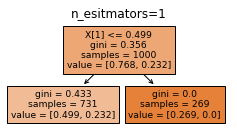


********** Running AdaBoost for n_estimator / stump = 2 **************


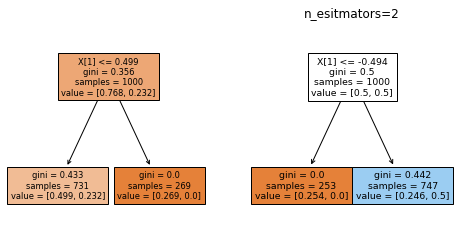


********** Running AdaBoost for n_estimator / stump = 3 **************


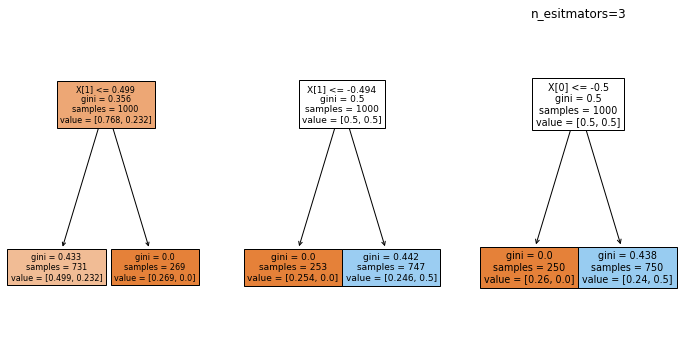


********** Running AdaBoost for n_estimator / stump = 4 **************


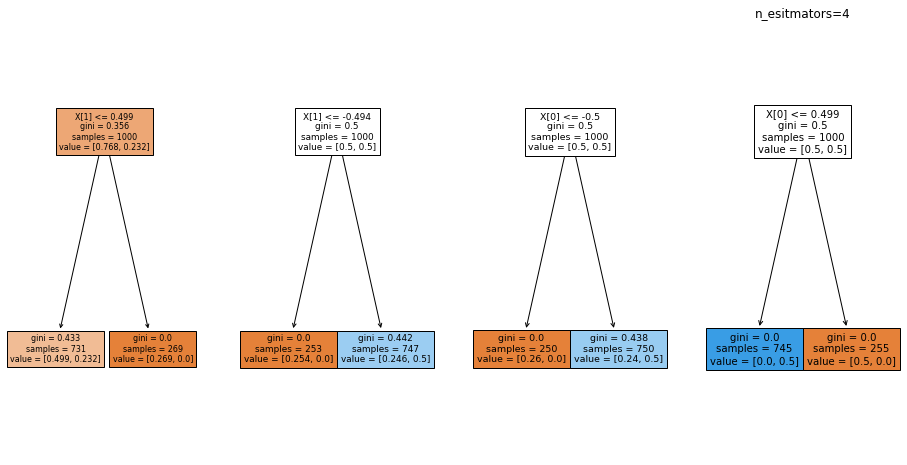


********** Running AdaBoost for n_estimator / stump = 5 **************


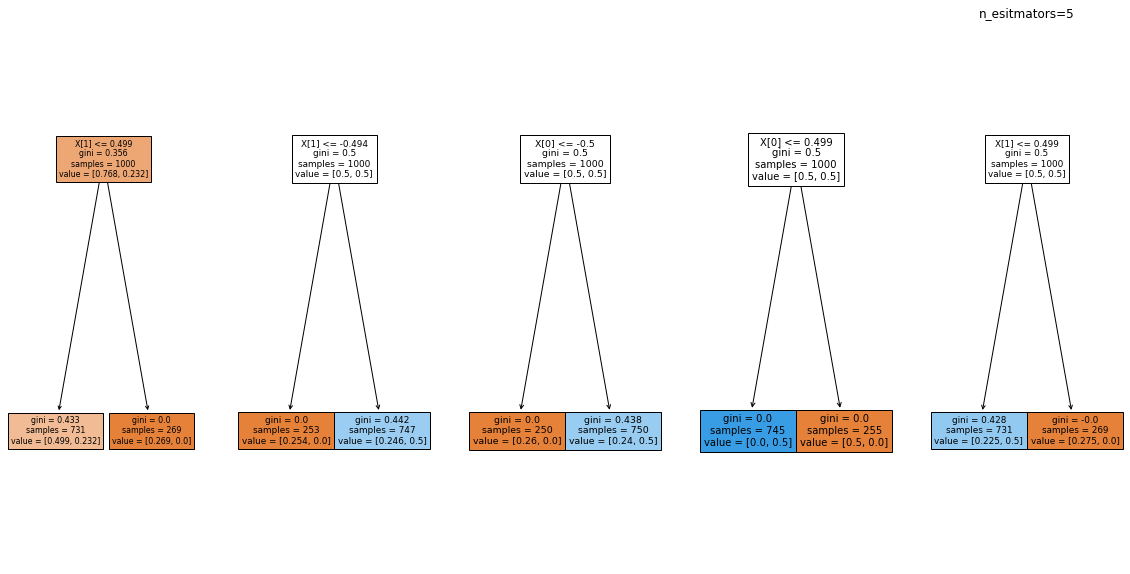

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

accuracy_dict = {}

for n_est in range(1,6):
    print(f"\n********** Running AdaBoost for n_estimator / stump = {n_est} **************")
    model = AdaBoostClassifier(n_estimators=n_est, random_state=0)
    model.fit(X,Y)
    
    #Accuracy
    predictions = model.predict(X)
    err_predictions = np.not_equal(Y,predictions)
    training_error = float(np.sum(err_predictions))/len(Y)
    accuracy = 1 - training_error
    accuracy_dict[n_est] = round(accuracy,3)
    
    #tree plots
    plt.figure(figsize=(n_est*4,n_est*2))
    #All the classifiers
    stumps = model.estimators_
    for i in range(len(stumps)):
        plt.subplot(1,len(stumps),i+1)
        tree.plot_tree(stumps[i],filled=True)
    plt.title(f"n_esitmators={n_est}")
    plt.show()


In [9]:
#lets go through each classifier from ada boost and get the accuracy score
# staged_accuracy = list(model.staged_score(X,Y))
# header = "{:<8} {:<10}".format('stump', 'accuracy')
# print('-' * len(header))
# print(header)
# print('-' * len(header))
# for i in range(len(stumps)):
#     print("{:<8} {:<10}".format(i+1,staged_accuracy[i]))
# print('-' * len(header))

In [10]:
header = "{:<8} {:<10}".format('# stump', 'accuracy')
print('-' * len(header))
print(header)
print('-' * len(header))
for key in accuracy_dict:
    print("{:<8} {:<10}".format(key,accuracy_dict[key]))
print('-' * len(header))    

-------------------
# stump  accuracy  
-------------------
1        0.768     
2        0.768     
3        0.882     
4        1.0       
5        1.0       
-------------------
